### EDA_01: Initial Exploratory Data Analysis
##### Project name: Employee Churn Prediction
##### Author: Fausto Pucheta Fortin

### **Overview:**
The following notebook is meant to give a first look at the raw data, asses its quality, and distribution.
The *EDA_01* notebook gives the basis for further Bivariate analysis, which will be performed in *EDA_02*.

### **Tasks:**
#### 1. Data Understanding:
Get a sense of the quality of the data, its format, and distribution.
Each plot and relevant output will be saved in *"../reports/figures/EDA_01"*.

##### 1.1 Overview of Dataset Structure:
- Preview of Rows and Columns: Use *df.head()* to get a first look at the data sample.
- Data Types and Missing Values: Use *df.info()* to inspect data types, spot possible type mismatches, and identify fields with missing values.

##### 1.2 Feature-Specific Summaries (Tabular Reports):
- Continuous Features: Run *tr_continuous_f()* to compute summary statistics (mean, median, range, variance) and identify outliers.
- Categorical Features: Use *tr_categorical_f()* to examine unique values, top categories, and frequencies for initial pattern detection.

#### 2. Univariate Analysis
**Objective:** 
- Assess the central tendency and distributions of each continuous feature.
- Assess proportions of each categorical feature.
- Identify data irregularities such as null values, skewness, or outliers.

##### 2.1 Continuous Features:
- **Method:**
    - Box Plots
    - Histograms
##### 2.2 Categorical Features:
- **Method:**
    - Stacked Bar Plots
##### 2.3 Missing Values Summary:
- **Method:**
    - Stacked Bar Plots
#### 3. Data Cleaning and Preparation
Objective: Prepare data for analysis by removing irrelevant fields, handling missing values, addressing outliers, and ensuring consistency.

##### 3.1 Column Reduction:
- Drop irrelevant or duplicated columns, documenting reasons (e.g., redundant IDs, irrelevant data for analysis).
##### 3.2 Missing Values Imputation Strategy (if applicable):
- Continuous Featuress: Impute missing values using the median.
- Categorical Features: Consider mode imputation or assign a placeholder value for categorical nulls.
##### 3.3 Outlier Treatment (if applicable):
- Capping: Replacement of outliers with the upper or lower bound using the Interquartile Range mehotd (IQR).


### **Initial Observations and Insights**

The dataset contains 14,999 entries and 10 features, with no missing values and no outliers detected. Key insights from the data structure and initial analysis include:

**Continuous Features:**
- Satisfaction Level: Mean satisfaction is 0.61, with a standard deviation of 0.25, indicating varied levels of employee satisfaction.
- Last Evaluation: Scores average 0.72, with most employees scoring between 0.56 and 0.87.
- Number of Projects: Employees have completed an average of 3.8 projects, ranging from 2 to 7.
- Average Monthly Hours: The average monthly hours worked is 201, with substantial variation across employees (SD = 49.94).
Time Spent at Company: Tenure averages 3.5 years, with some employees staying as long as 10 years.


**Categorical Features:**
- Department: The dataset spans 10 departments, with "sales" as the most common department (27.6%), followed by technical and support roles.
- Salary: Salary levels are distributed across three categories—low (49%), medium (43%), and high—indicating a mostly low-to-medium salary distribution.

**Binary Features:**
- Work Accident: 14.5% of employees reported a workplace accident, a feature retained for its potential relevance to attrition analysis.
- Promotion Last 5 Years: Only 2.1% of employees received a promotion, suggesting limited upward mobility, which may be relevant to retention.
- Left: The target variable shows that 23.8% of employees have left the company, highlighting an imbalance that will need addressing in the modeling phase.

In [1]:
# Import Essential Libraries

#import sys
#sys.path.append('../src/utils/functions')

# EDA funcitons
from src.utils.tabular_reports import *
from src.utils.plot_functions import *

# Operational libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Null values imputation
from src.utils.null_imputation import NullImputer

# Data
df = pd.read_csv("../data/raw/HR_capstone_dataset.csv")

#### 1. Data Understanding

##### 1.1 Overview of Dataset Structure:

In [2]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


##### 1.2 Feature-Specific Summaries (Tabular Reports):

In [4]:
# TABULAR REPORT CONTINUOUS FEATURES
tr_continuous(df)

,Feature,Count,Miss %,Card.,Min,1st QRT,Mean,Median,3rd QTR,Max,STD Dev
0,satisfaction_level,14999,0.0,92,0.09,0.44,0.612834,0.64,0.82,1.0,0.248631
1,last_evaluation,14999,0.0,65,0.36,0.56,0.716102,0.72,0.87,1.0,0.171169
2,number_project,14999,0.0,6,2.00,3.00,3.803054,4.00,5.00,7.0,1.232592
3,average_montly_hours,14999,0.0,215,96.00,156.00,201.050337,200.00,245.00,310.0,49.943099
4,time_spend_company,14999,0.0,8,2.00,3.00,3.498233,3.00,4.00,10.0,1.460136
5,Work_accident,14999,0.0,2,0.00,0.00,0.144610,0.00,0.00,1.0,0.351719
6,left,14999,0.0,2,0.00,0.00,0.238083,0.00,0.00,1.0,0.425924
7,promotion_last_5years,14999,0.0,2,0.00,0.00,0.021268,0.00,0.00,1.0,0.144281


In [5]:
# TABULAR REPORT CATEGORICAL FEATURES
tr_categorical(df)

,Feature,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Department,Department,14999,0.0,10,sales,4140,27.601840,"[technical, support, IT, product_mng, marketin...",2720,18.134542
salary,salary,14999,0.0,3,low,7316,48.776585,"[medium, high]",6446,42.976198


#### 2. Univariate Analysis

##### 2.1 Continuous Features:

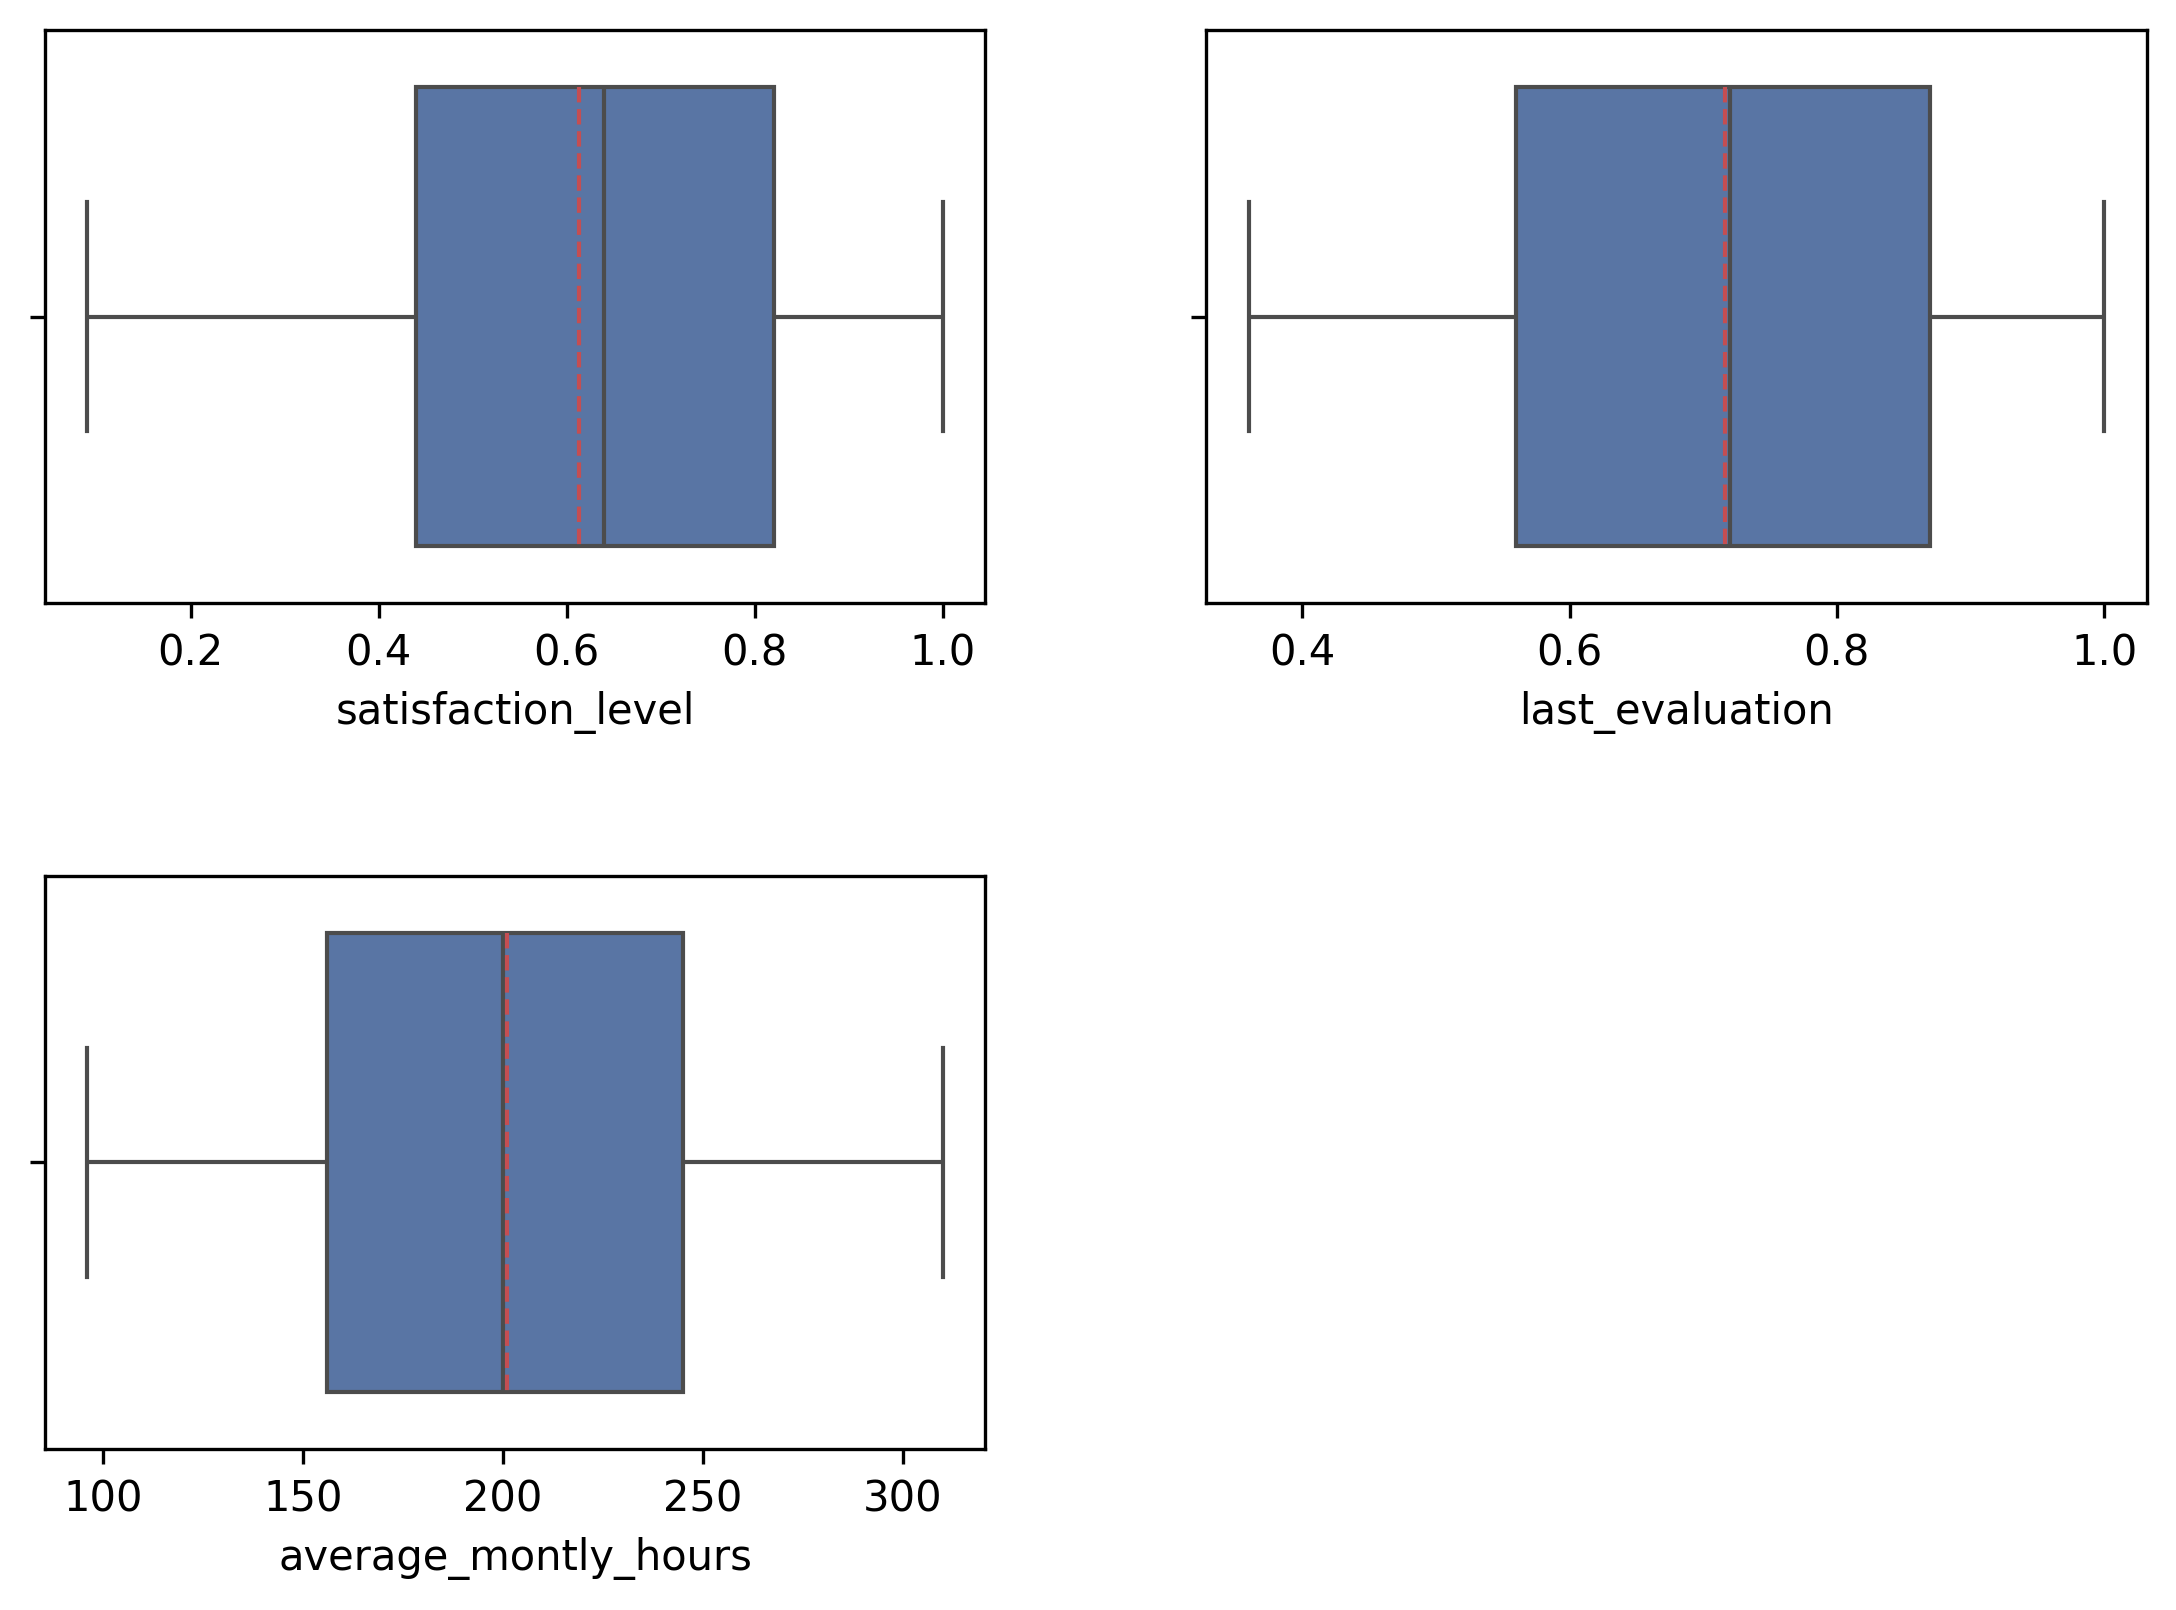

Saved at ./../reports/figures/01-EDA_01\boxplots_cont_features.png


In [6]:
# Filter out continuous features with cardinality > 9
continuous_features = df.select_dtypes(include='number')
selected_features = continuous_features.columns[continuous_features.nunique() > 9]

# Calculate the number of rows and columns for the subplots
num_plots = len(selected_features)
num_cols = min(num_plots, 2)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8,6))

for i, feature in enumerate(selected_features):
        ax = axes[i // num_cols][i % num_cols]
        sns.boxplot(ax=ax, data=continuous_features, x=feature, showmeans=True, meanline=True, patch_artist=True)
        fig.tight_layout(pad=3.0)
        
# Remove extra axes if there are any empty subplots
for i in range(len(selected_features), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols][i % num_cols])

# Save Figure
save_fig(fig, "./../reports/figures/01-EDA_01", "boxplots_cont_features", "png")

In [7]:
enumerate(continuous_features[selected_features])

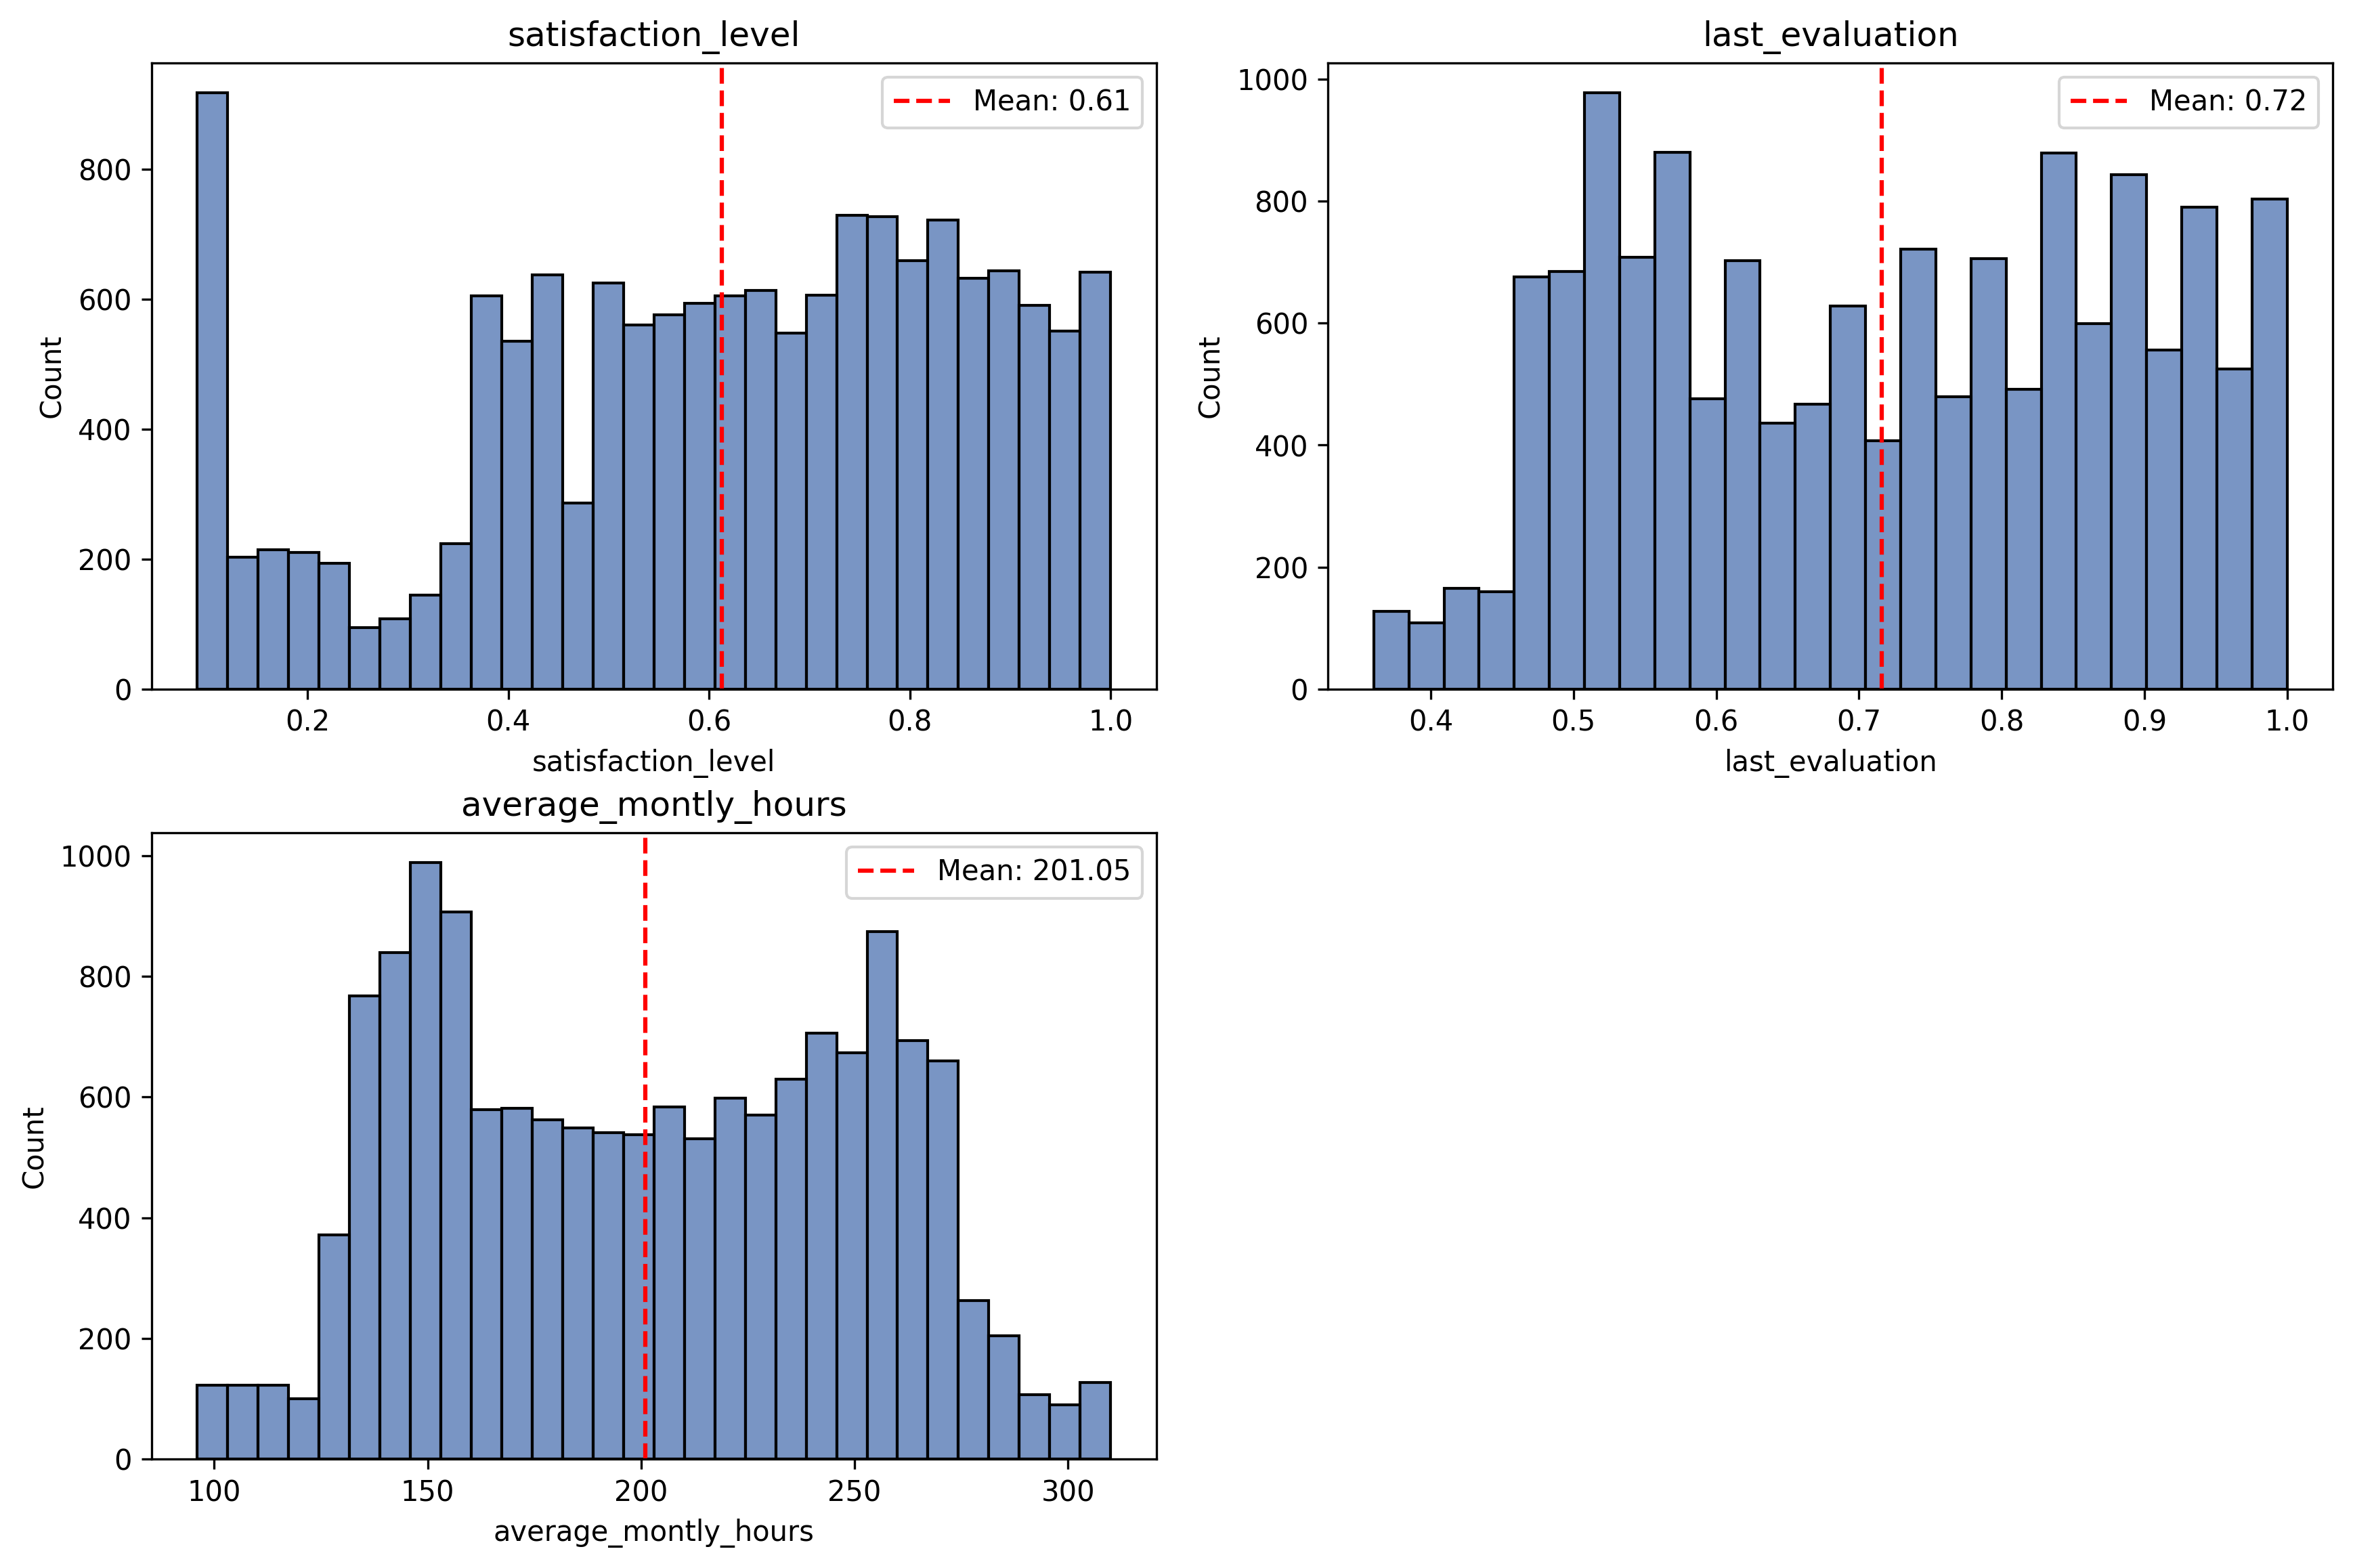

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
fig.tight_layout(pad=3.0)

# 1D array for consistent indexing
axes = axes.flatten() if num_rows * num_cols > 1 else [axes]

# Histograms for each selected column
for i, col in enumerate(selected_features):
    ax = axes[i]  # Access subplot
    sns.histplot(data=continuous_features, x=col, ax=ax)  # Plot histogram
    
    # Calculate and add mean line
    mean_value = continuous_features[col].mean()
    ax.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
    
    # Add title and legend
    ax.set_title(col)
    ax.legend()

# Remove any unused subplots
for j in range(len(selected_features), len(axes)):
    fig.delaxes(axes[j])

plt.show()


##### 2.2 Categorical Features:

<Figure size 1800x1200 with 0 Axes>

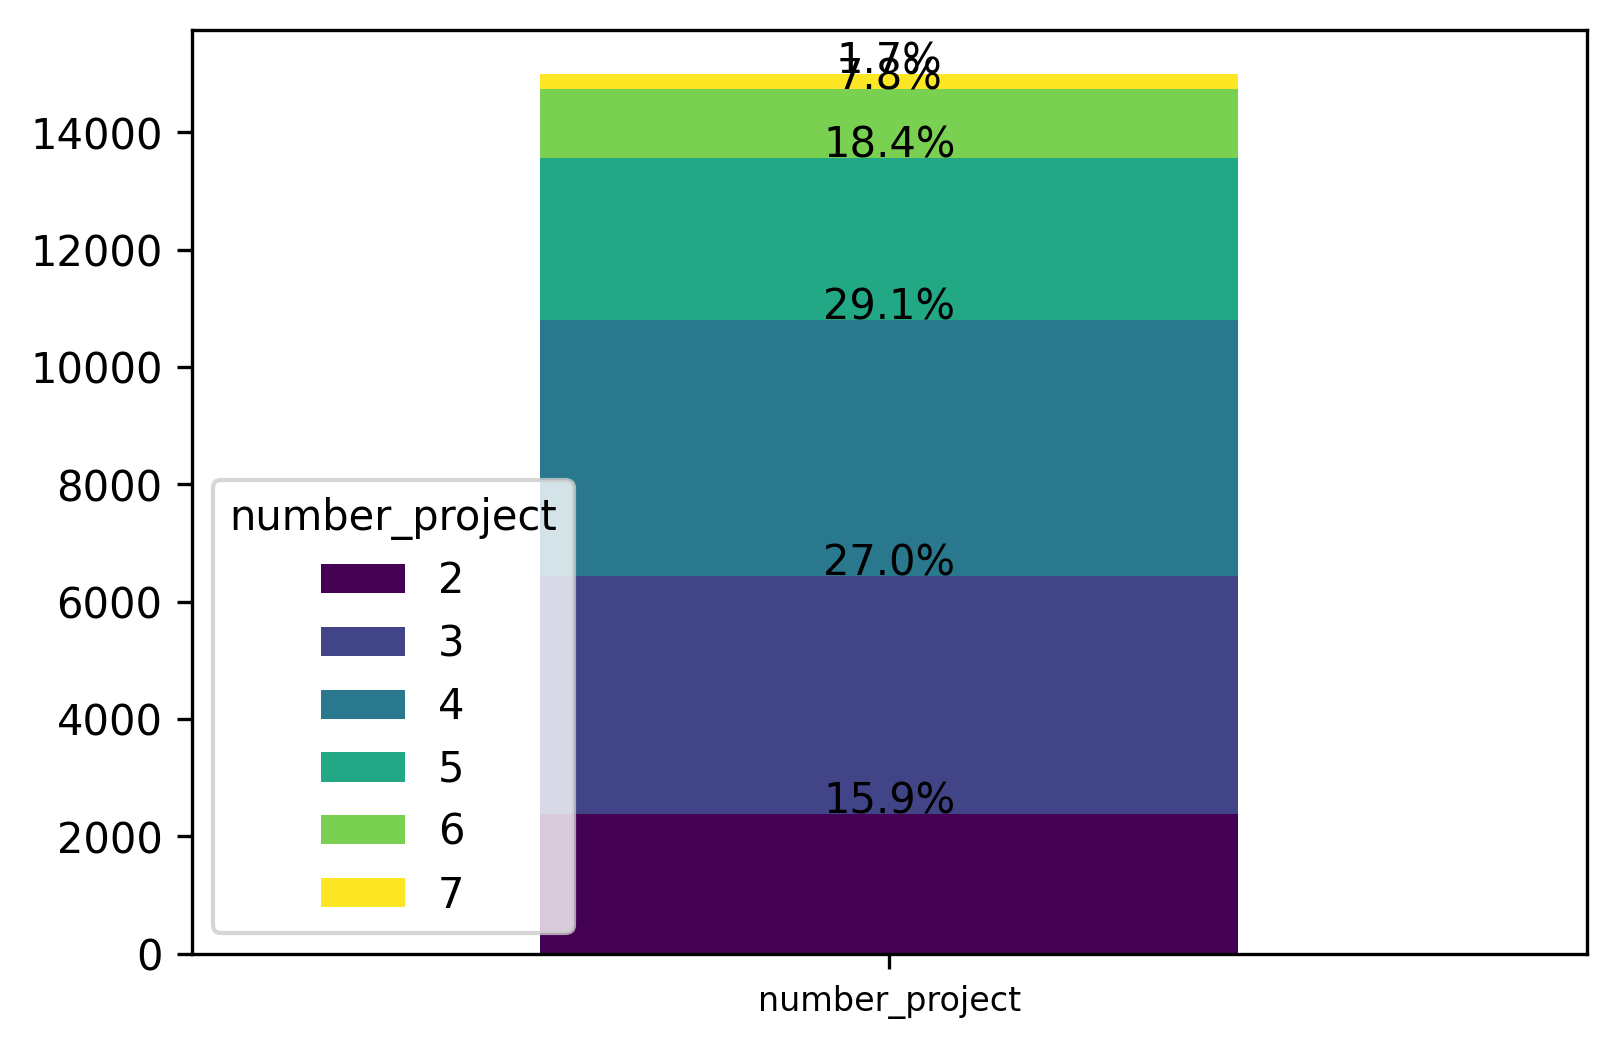

Saved at ./../reports/figures/01-EDA_01


<Figure size 1800x1200 with 0 Axes>

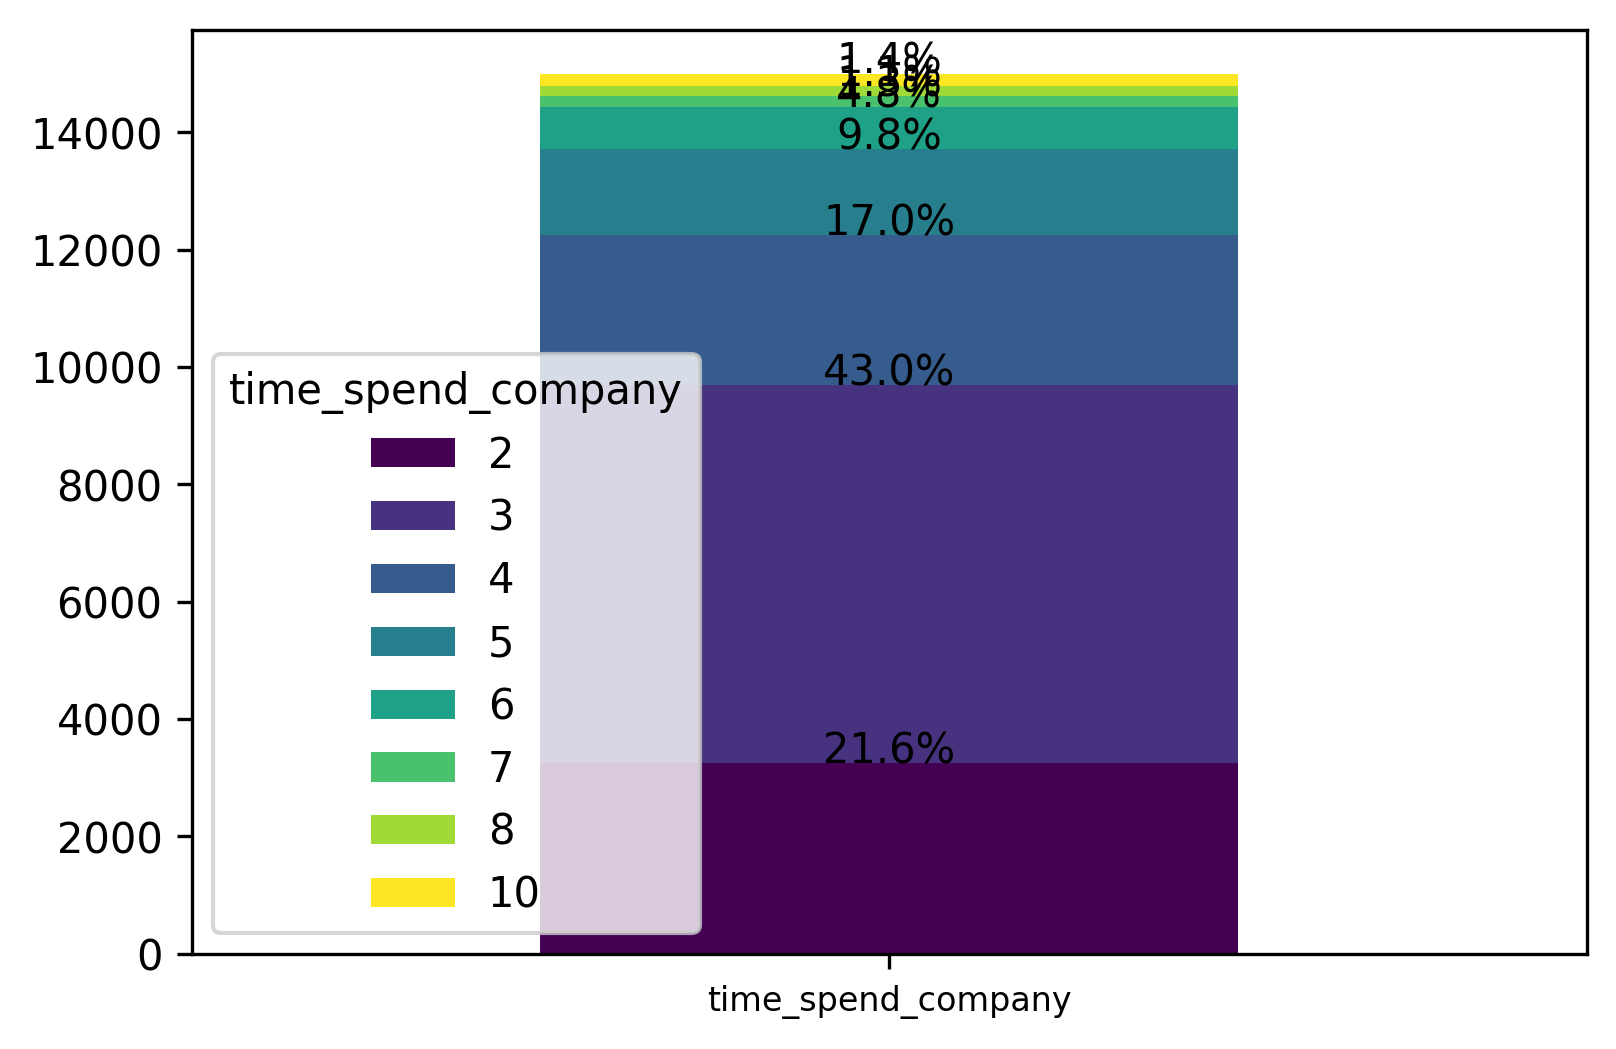

Saved at ./../reports/figures/01-EDA_01


<Figure size 1800x1200 with 0 Axes>

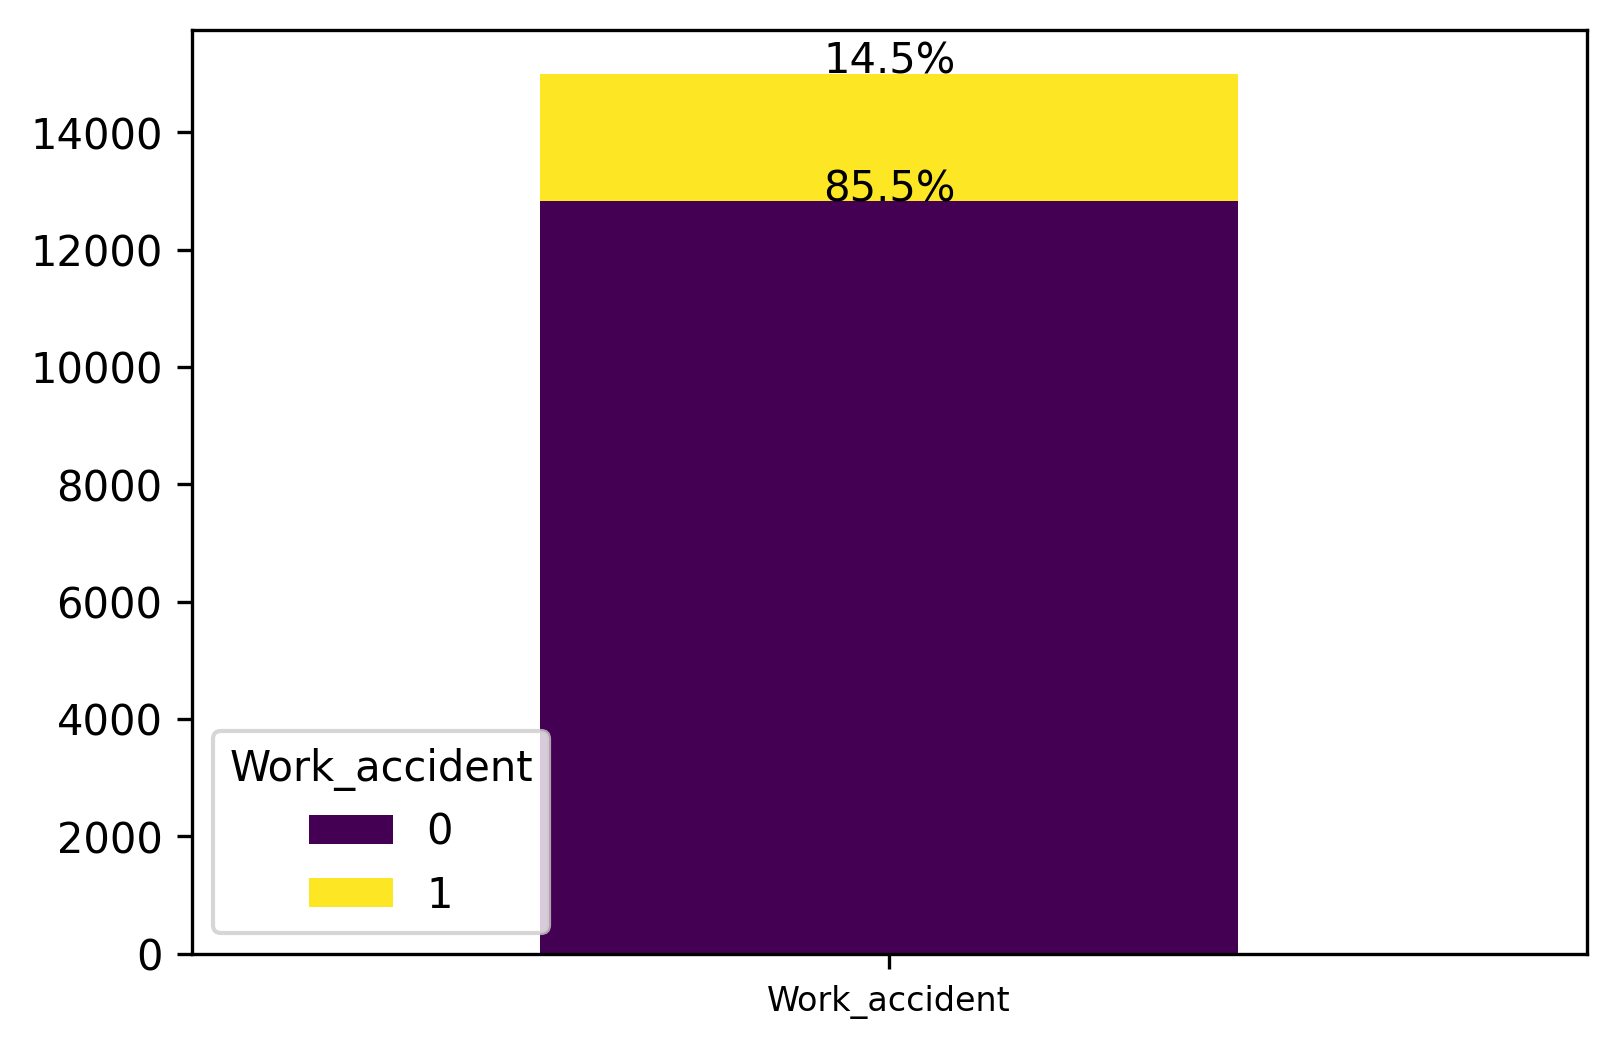

Saved at ./../reports/figures/01-EDA_01


<Figure size 1800x1200 with 0 Axes>

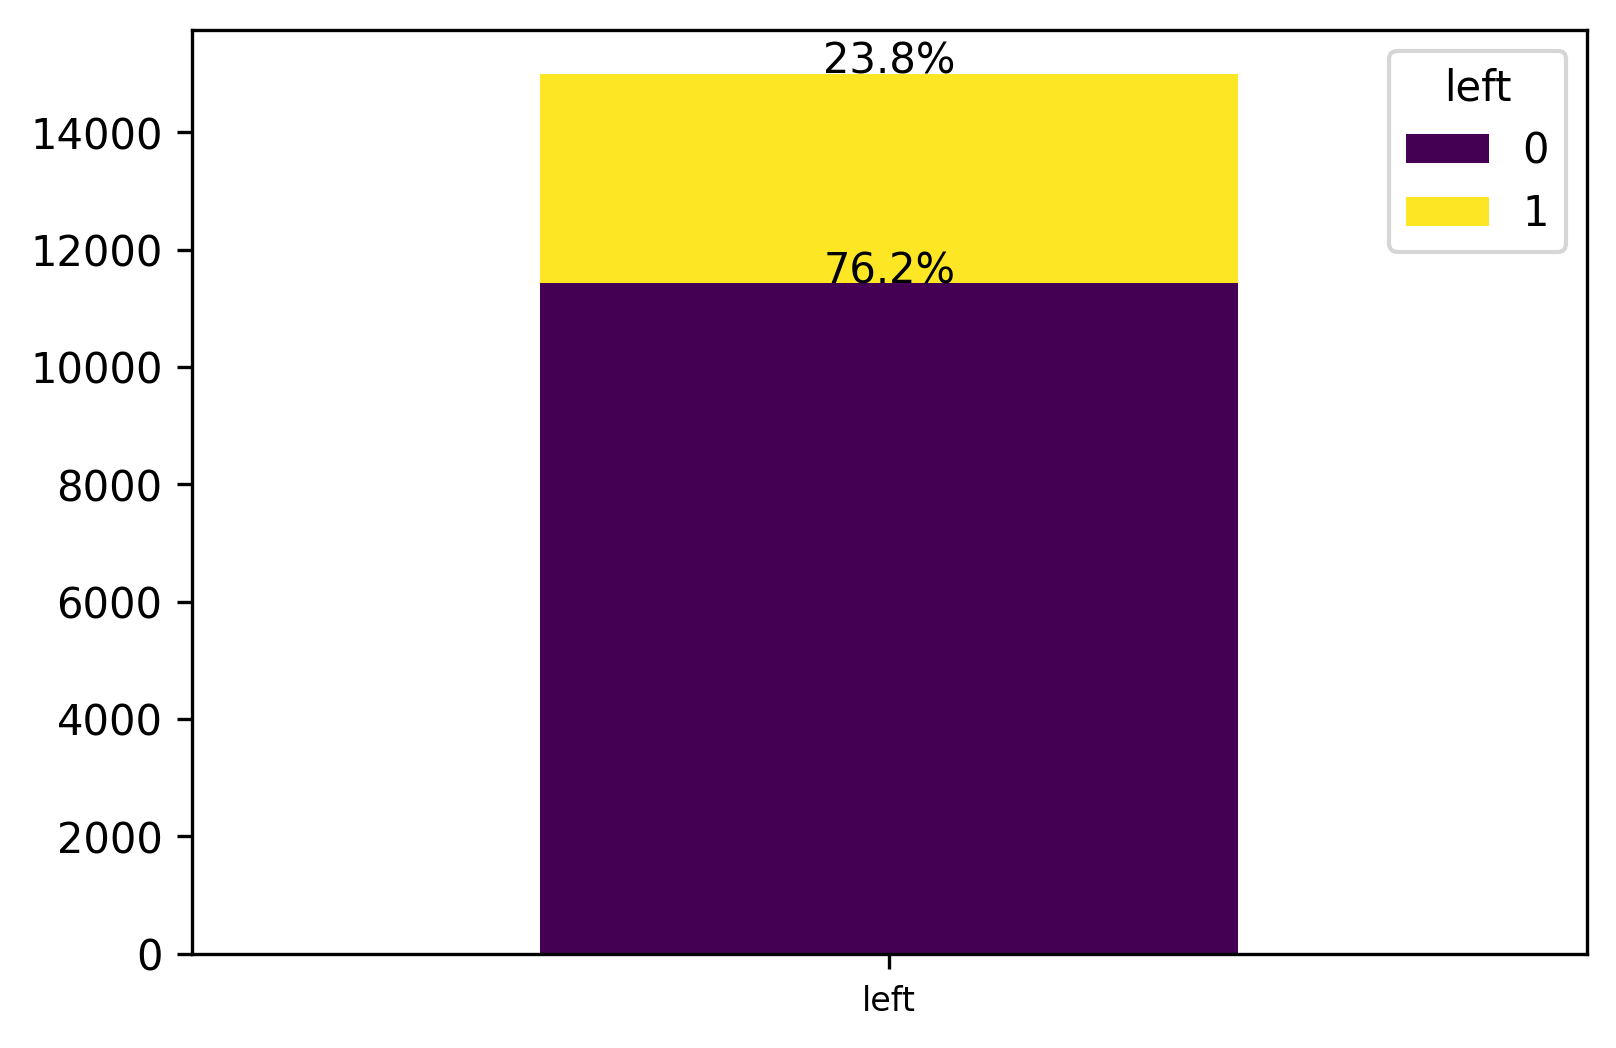

Saved at ./../reports/figures/01-EDA_01


<Figure size 1800x1200 with 0 Axes>

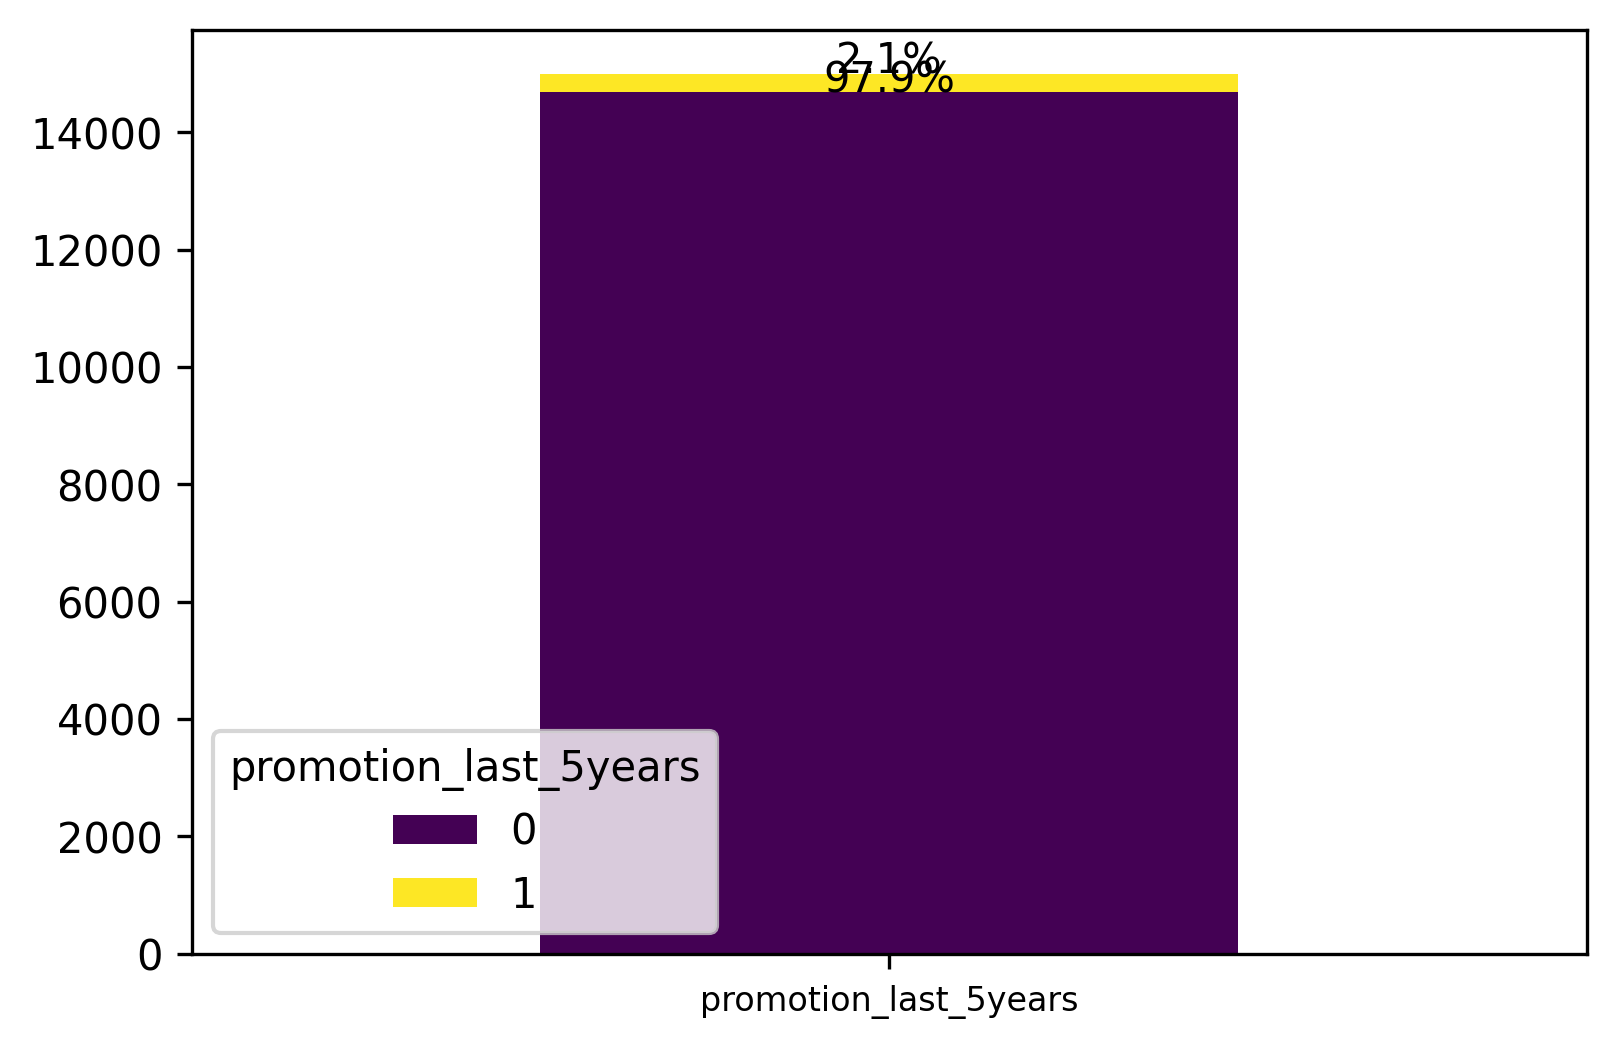

Saved at ./../reports/figures/01-EDA_01


<Figure size 1800x1200 with 0 Axes>

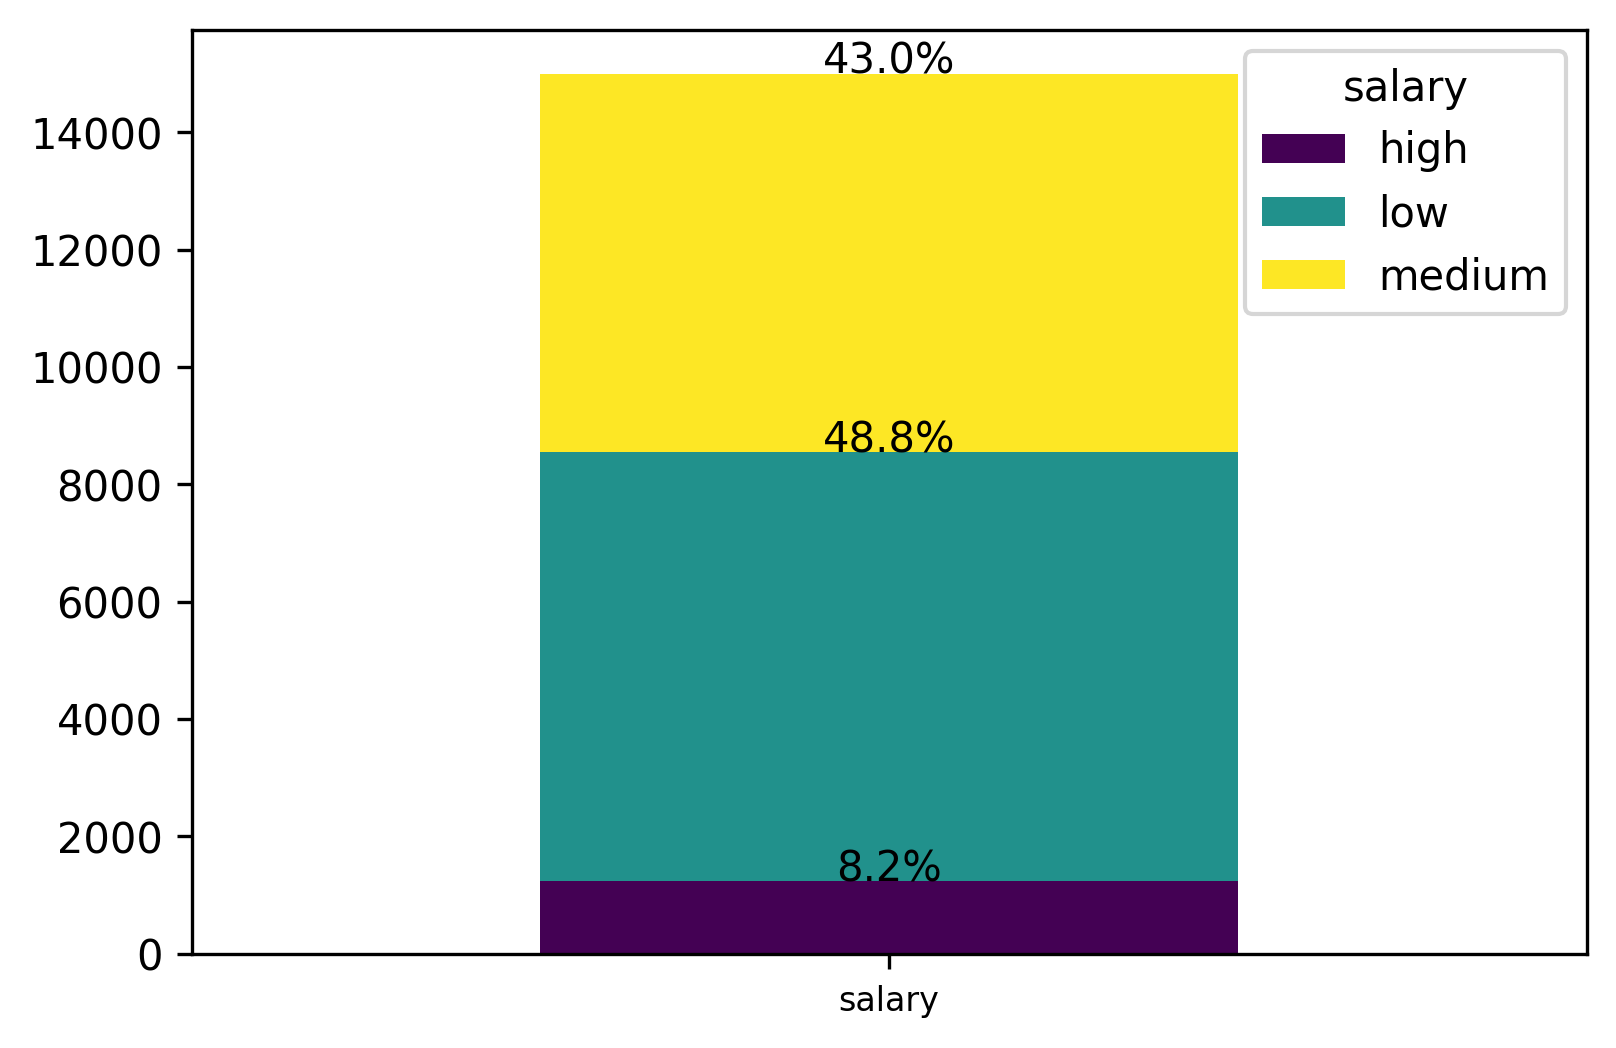

Saved at ./../reports/figures/01-EDA_01


In [9]:
# Select columns with categorical features (low cardinality)
categorical_cols = [col for col in df.columns if df[col].nunique() < 10]
df_cat = df[categorical_cols]

for feature in df_cat:
    stacked_plot(df_cat, feature, "./../reports/figures/01-EDA_01")

In [10]:
grouped_stacked_bars(df, "./../reports/figures/01-EDA_01")

Saved at ./../reports/figures/01-EDA_01


2.3 Missing Values Summary

c:\users\fausto\employee-churn-prediction-model\src\utils\plot_functions.py:292: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(non_null_counts.index, rotation=90)


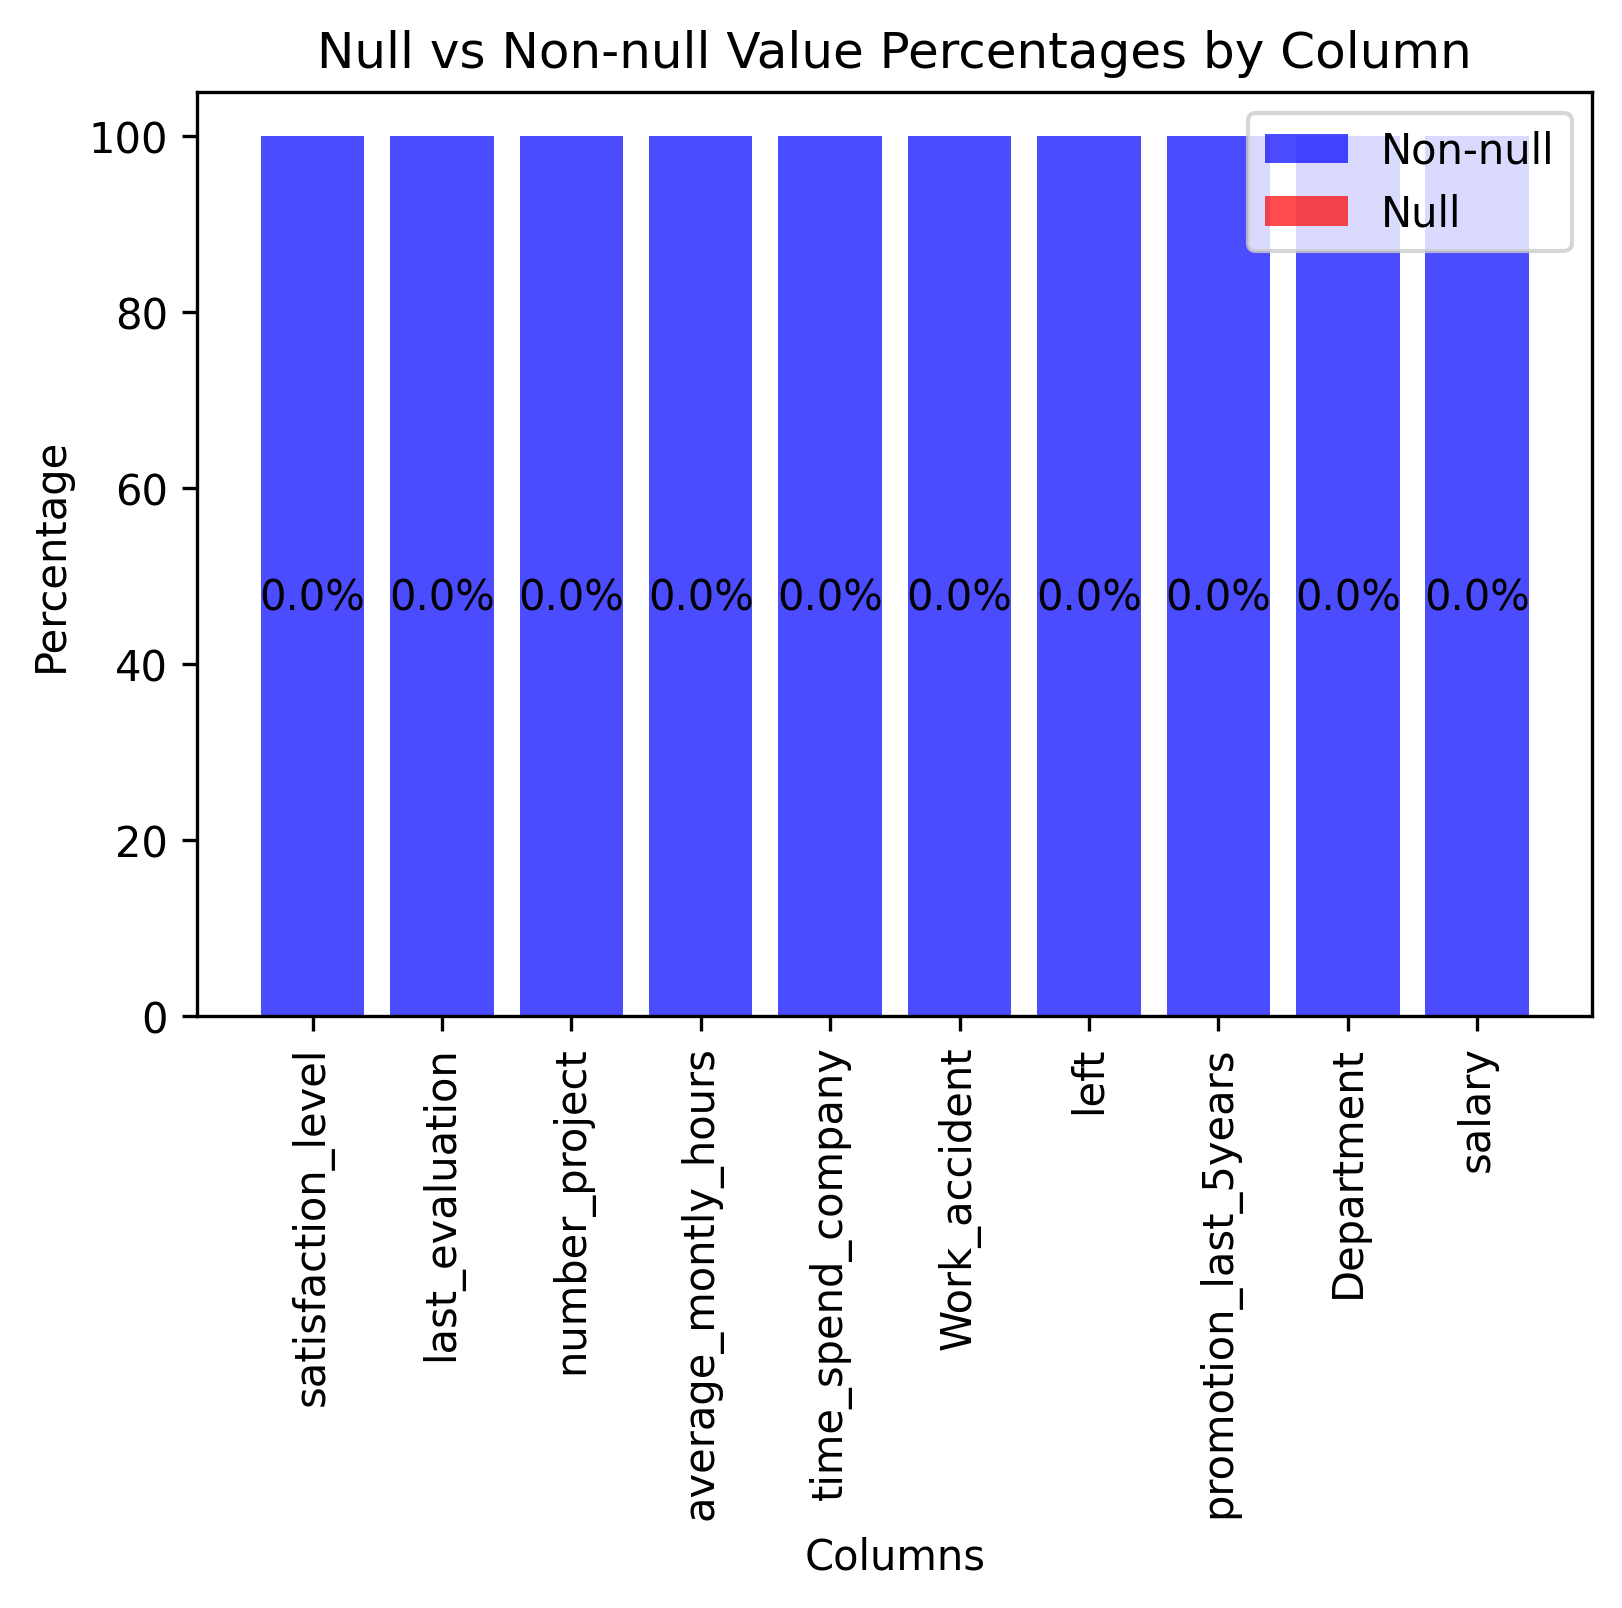

In [11]:
total_nulls_barplot = total_nulls_barplot(df)

In [12]:
# Save Total Nulls Barplot
save_total_nulls_barplot(total_nulls_barplot, "./../reports/figures/01-EDA_01")

Saved at ./../reports/figures/01-EDA_01\total_nulls_barplot.png


#### 3. Data Cleaning and Preparation

**Drop of promotion_last_5years feature:**
Due to a high imbalance of values in this feature (97.9% to 2.1%), the final decision will be to remove it from the dataset.

Explanation:
- Low Variance: With almost all instances in one class, this feature has low variance, meaning it barely differentiates between classes. In effect, the model will likely ignore it, as it contributes limited or no new information.
- Potential Noise Introduction: Including a highly imbalanced feature can introduce noise, leading to a small but unnecessary increase in model complexity without adding substantial value.
- Class Imbalance Amplification: If the target variable is also imbalanced, this feature might amplify bias towards the majority class, especially in algorithms sensitive to feature imbalance.
- Model Training Efficiency: Removing such features can improve training efficiency, as the model won’t spend time processing features that don’t add to prediction power.

##### 3.1 Column Reduction:

In [13]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [14]:
df_subset = df.drop(columns=["promotion_last_5years"], axis=1)

In [15]:
df_subset.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,Department,salary
0,0.38,0.53,2,157,3,0,1,sales,low
1,0.80,0.86,5,262,6,0,1,sales,medium
2,0.11,0.88,7,272,4,0,1,sales,medium
3,0.72,0.87,5,223,5,0,1,sales,low
4,0.37,0.52,2,159,3,0,1,sales,low
5,0.41,0.50,2,153,3,0,1,sales,low
6,0.10,0.77,6,247,4,0,1,sales,low
7,0.92,0.85,5,259,5,0,1,sales,low
8,0.89,1.00,5,224,5,0,1,sales,low
9,0.42,0.53,2,142,3,0,1,sales,low


##### 3.2 Missing Values Imputation Strategy:

No missing value was detected in the dataset.

##### 3.3 Outlier Detection and Treatment:

No outlier was detected during the analysis

In [16]:
# Saving the cleaned dataset
df_subset.to_csv('./../data/processed/df_subset.csv', index=False)  # Save without row index